<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
بهار 1401
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین دوم عملی
            	<br/>
			</font>
طراح: علیرضا نوروزی 
			<br/><br/> 
موعد تحویل: 3 اردیبهشت 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال اول
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       در این تمرین قصد داریم مرحله پلی آف مسابقات NBA را شبیه سازی کنیم.
        هر سری در مرحله پلی آف به صورت 4از 7 برگزار میشود به این معنی که 2 تیم تا وقتی یکی از بین شان 4 پیروزی کسب کند
بازی ها را ادامه میدهند       .
        حال شما برای شروع کافی است تابعی بنویسید که احتمال برد یک سری از بازی را محاسبه کند.
        میتوانید این سری را 1000 بار تکرار کنید و تعداد باری که تیم با احتمال برد p برنده میشود را گزارش کنید.
        فرض کنید تیم یک در هر بازی به احتمال p برنده میشود.
        و بسکتبال تساوی هم ندارد.
        
</div>

In [2]:
NBA_win_prob <- function(p, N, n=7) sum(rbinom(N, n, p) > floor(n/2)) / N

NBA_win_prob(0.3, 1000)

[1] 0.128

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        حال برای p های بزرگتر از نیم احتمال برنده شدن سری را محاسبه کنید.
        و نمودار مناسبی برای نمایش این اعداد رسم کنید.
</div>

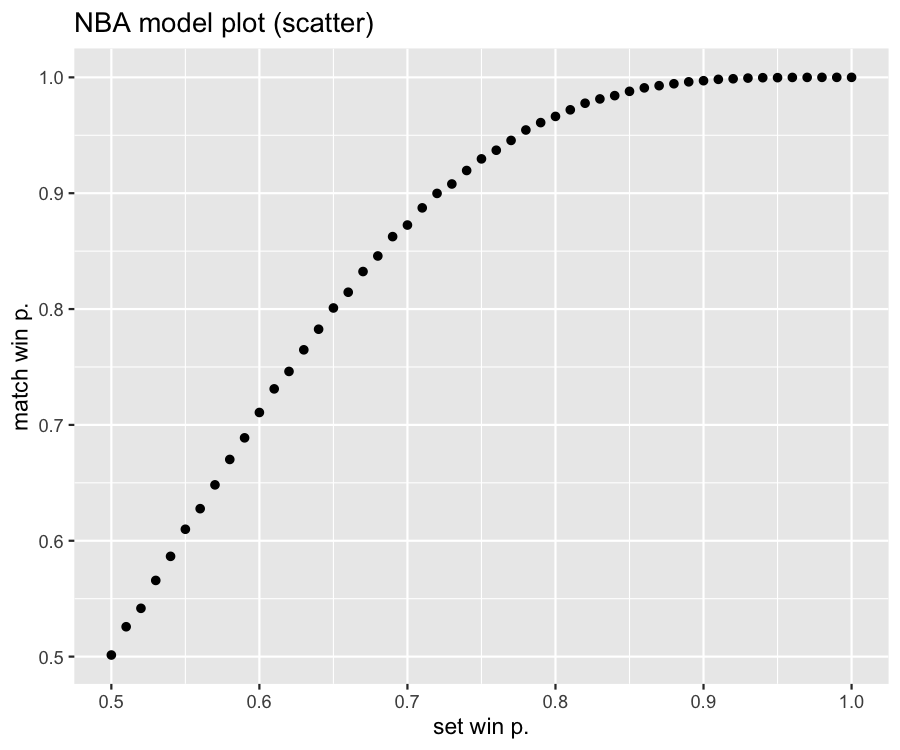

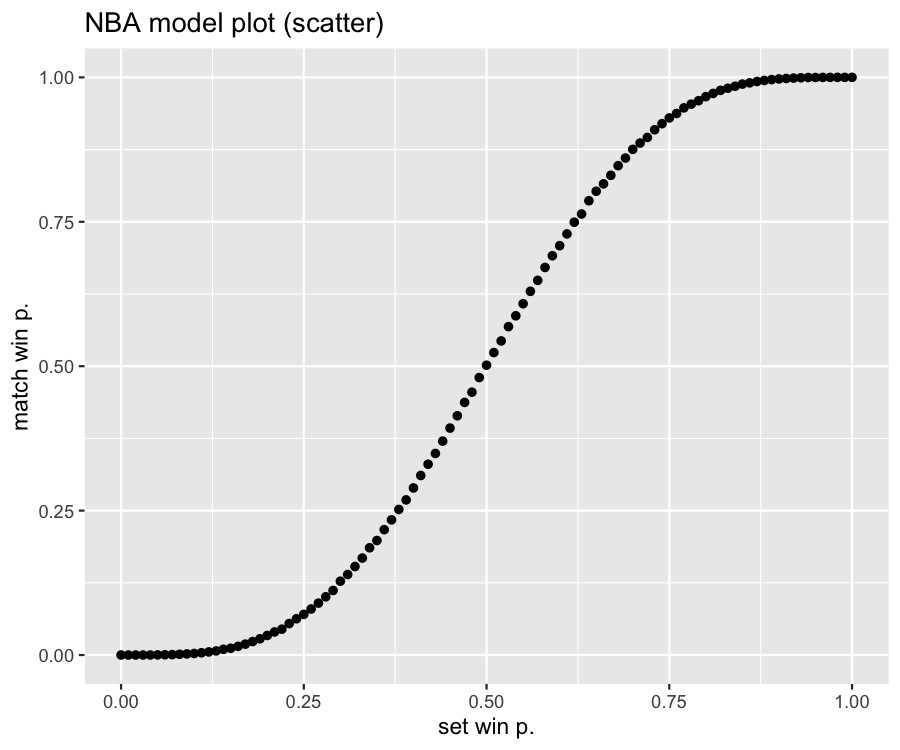

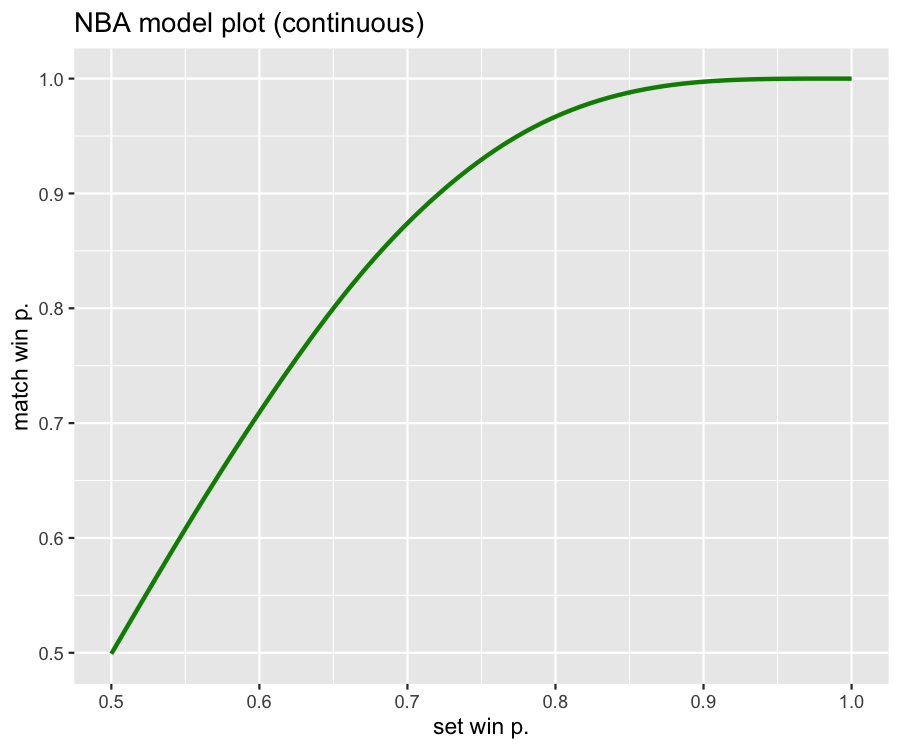

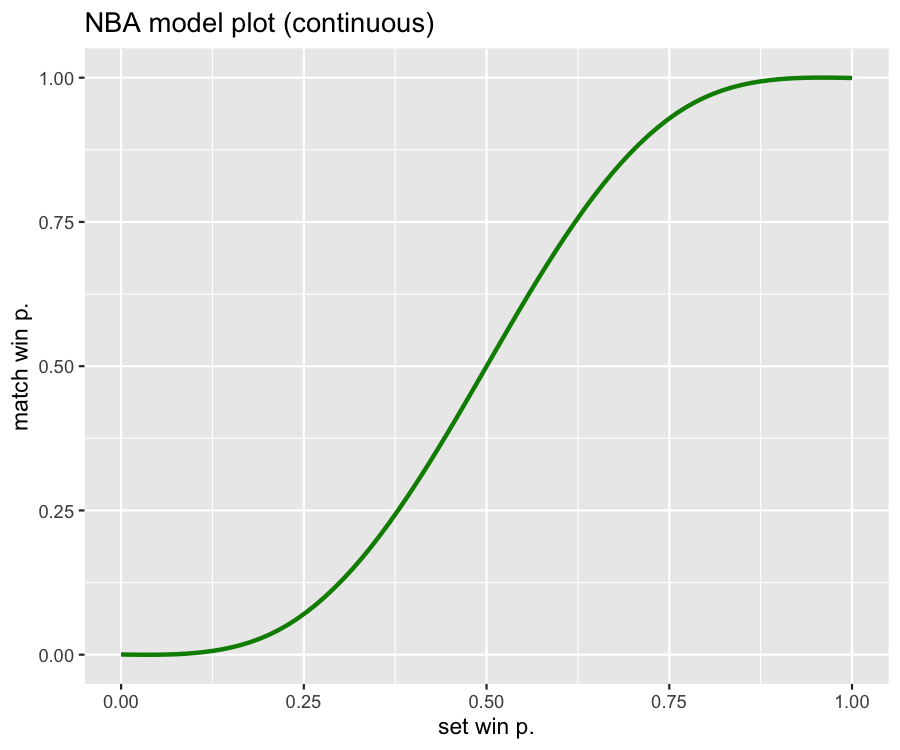

In [63]:
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=5, repr.plot.res=150)

NBA_plot_scatter  <- function(lower, upper) {
  NBA.data <- data.frame(
    p_set = (p_set <- seq(lower, upper, 0.01)), 
    p_match = sapply(p_set, NBA_win_prob, N = 100000))
  
  ggplot(NBA.data) + 
    geom_point(aes(x = p_set, y = p_match)) +
    labs(title = 'NBA model plot (scatter)', x = 'set win p.', y = 'match win p.')
}

NBA_plot_cont  <- function(lower, upper) {
  NBA.data <- data.frame(
    p_set = (p_set <- seq(lower, upper, 0.005)), 
    p_match = sapply(p_set, NBA_win_prob, N = 100000))
  
  ggplot(NBA.data) + 
    stat_smooth(aes(x = p_set, y = p_match), method = 'gam', formula = y ~ s(x, bs = "cs"), colour = 'green4') +
    labs(title = 'NBA model plot (continuous)', x = 'set win p.', y = 'match win p.')
}

NBA_plot_scatter(0.5, 1)
NBA_plot_scatter(0, 1)

NBA_plot_cont(0.5, 1)
NBA_plot_cont(0, 1)

# :)) وقتی بازه کامل تقارن به این قشنگی داره چرا 0.5 تا 1 رو بکشیم؟

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       با رسم نمودار برای n و p های مختلف نشان دهید برای تیم های قوی تر
        هر چه تعداد n بیشتر باشد
        احتمال اینکه یک سری را ببازند کمتر میشود و این نسبت را ببینید، مثلا برای p = 0.6 مقادیر مختلف n را بررسی کنید.
</div>

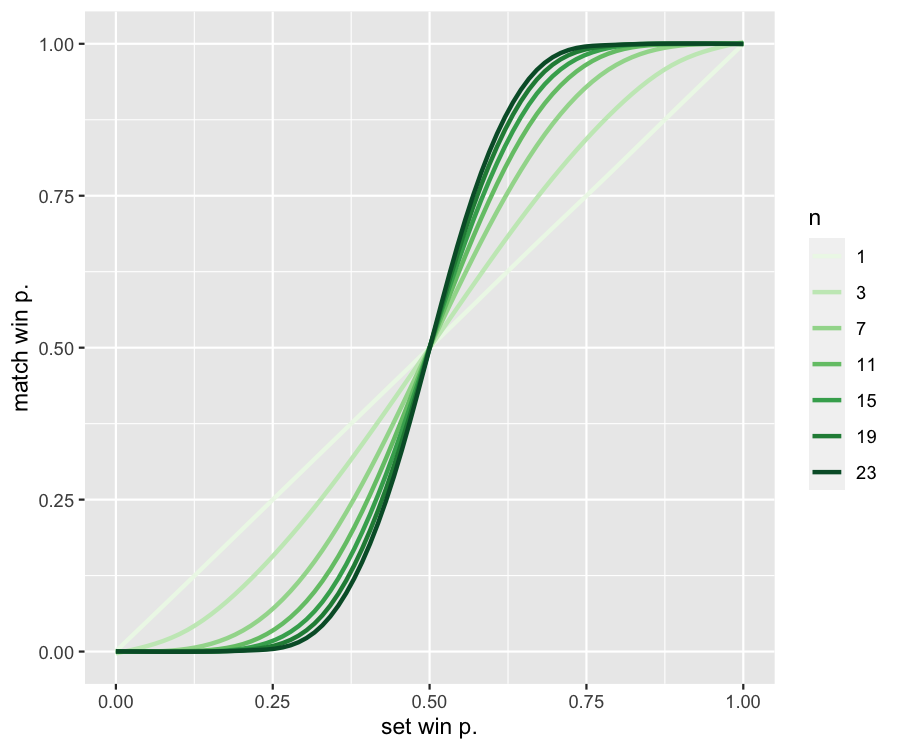

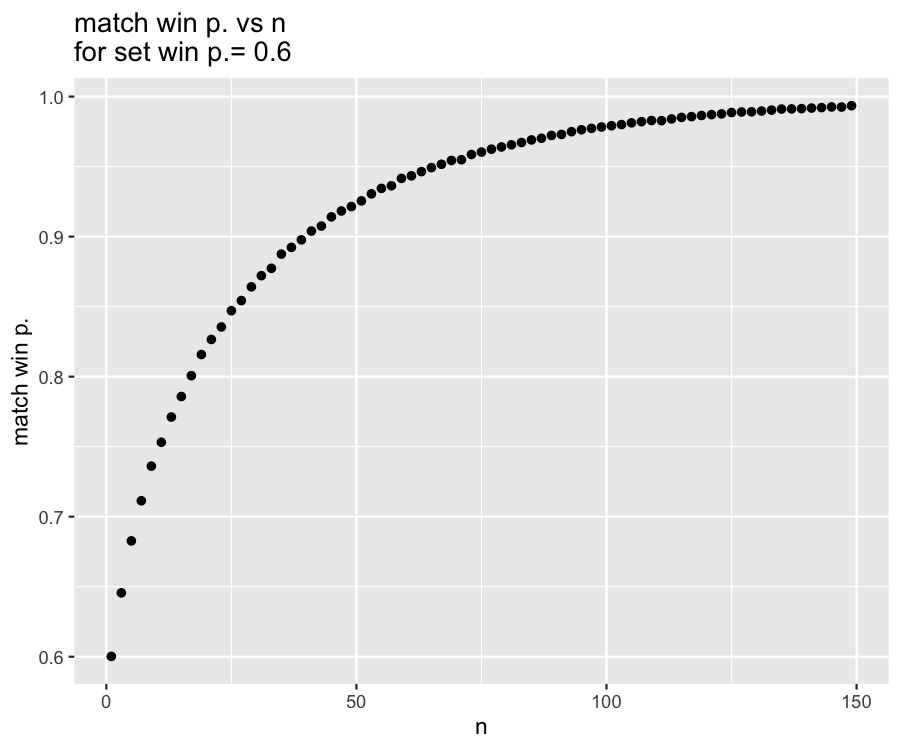

In [64]:
library(dplyr, warn.conflicts = FALSE)

p_set <- seq(0, 1, 0.01)
n  <- c(1, seq(3, 25, 4))

merged.df <- expand.grid(p_set=p_set, n=n) %>%
  mutate(p_match = mapply(NBA_win_prob, p_set, 100000, n))

ggplot(merged.df, aes(x=p_set, y=p_match, color = factor(n)))+
  geom_smooth(method='gam',se=FALSE,fullrange=TRUE, formula = y ~ s(x, bs = "cs"))+
  scale_color_brewer("n", palette="Greens")+
  labs(x = 'set win p.', y = 'match win p.')


df <- data.frame(
    n = (n <- seq(1, 150, 2)), 
    p_match = sapply(n, function(x) NBA_win_prob(0.6, 120000, x)))
  
ggplot(df) + 
  geom_point(aes(x = n, y = p_match)) +
  labs(title = 'match win p. vs n \nfor set win p.= 0.6', x = 'n', y = 'match win p.')

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       میدانیم از این 7 سری بازی 4 بازی در زمین تیم 1 و 3 بازی در تیم 2 انجام میشود.
            تابع قسمت قبل را به نحوی باز سازی کنید که هم احتمال برد در خانه و احتمال برد خارج از خانه و اینکه 4 بازی میکند یا 3 بازی را دریافت و مانند تابع قبلی احتمال برد
       سری را حساب کند
</div>

In [5]:
NBA_win_prob_enhanced <- function(p_home, p_away, N, n=7, first_home=TRUE) 
  sum((rbinom(N, floor(n/2) + ((n%%2) * first_home), p_home) + 
         rbinom(N, floor(n/2) + ((n%%2) * !first_home), p_away))
      > floor(n/2)) / N

NBA_win_prob_enhanced(0.6, 0.4, 1000)

[1] 0.529

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       به ازای مقادیر مختلف احتمال برد در خانه، احتمال برد در خارج از خانه و تعداد بازی در خانه نمودار مناسبی برای احتمال برد سری رسم کنید.
        برای رسم همه نمودار ها در یکجا درباره facet_wrap() مطالعه کنید.
</div>

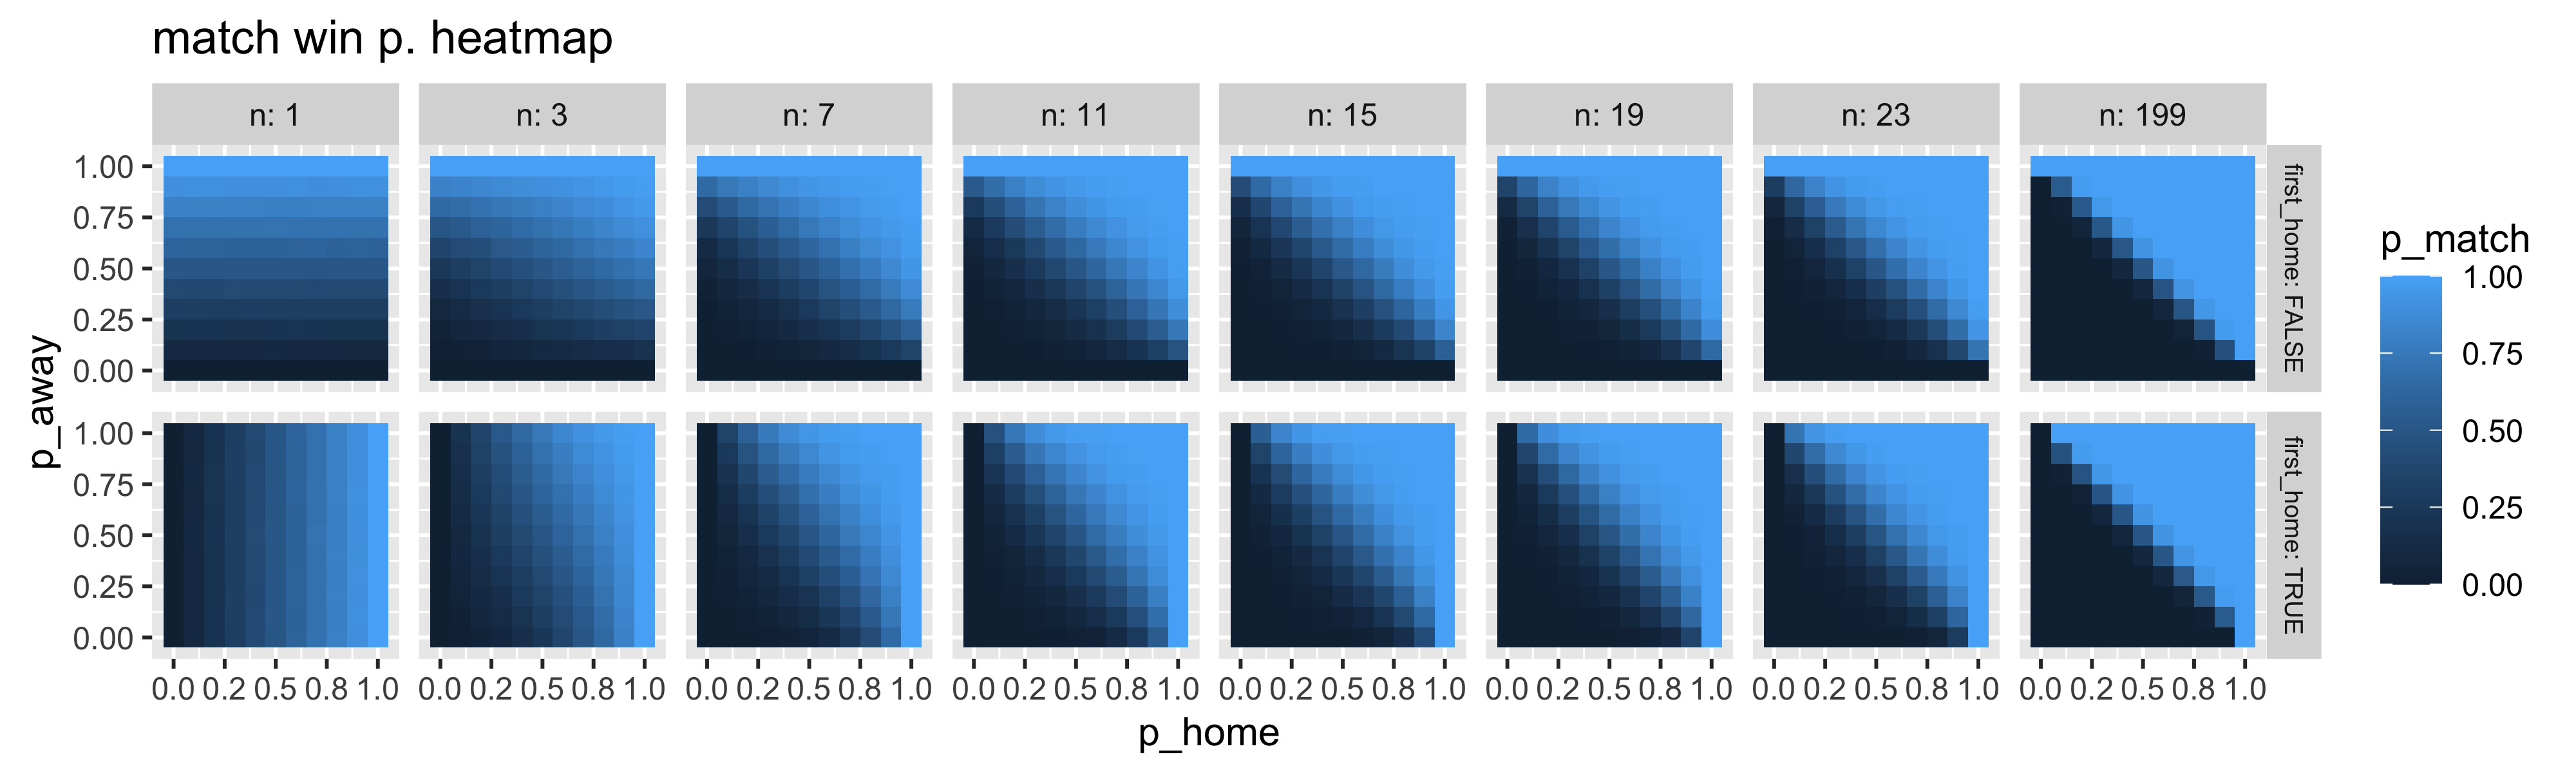

In [106]:
options(repr.plot.width=10, repr.plot.height=3, repr.plot.res=400)

p_home <- seq(0, 1, 0.1)
p_away <- seq(0, 1, 0.1)
n  <- c(1, seq(3, 25, 4), 199)
first_home  <- c(TRUE, FALSE)

data <- expand.grid(p_home=p_home, p_away=p_away, n=n, first_home=first_home) %>% 
  mutate(p_match = mapply(NBA_win_prob_enhanced, p_home, p_away, 10000, n, first_home))

ggplot(data, aes(p_home, p_away, fill=p_match))+ 
  geom_tile()+
  scale_x_continuous(labels=function(x) sprintf("%.1f", x))+
  facet_grid(first_home ~ n, labeller = label_both)+
  coord_fixed(ratio = 1)+
  theme(strip.text.y = element_text(size = 7))+
  labs(title = 'match win p. heatmap')

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       با استفاده از geom_raster()
        نموداری رسم کنید که تاثیر شروع        
         بازی در خانه یا خارج از خانه را نشان دهد.
 
</div>

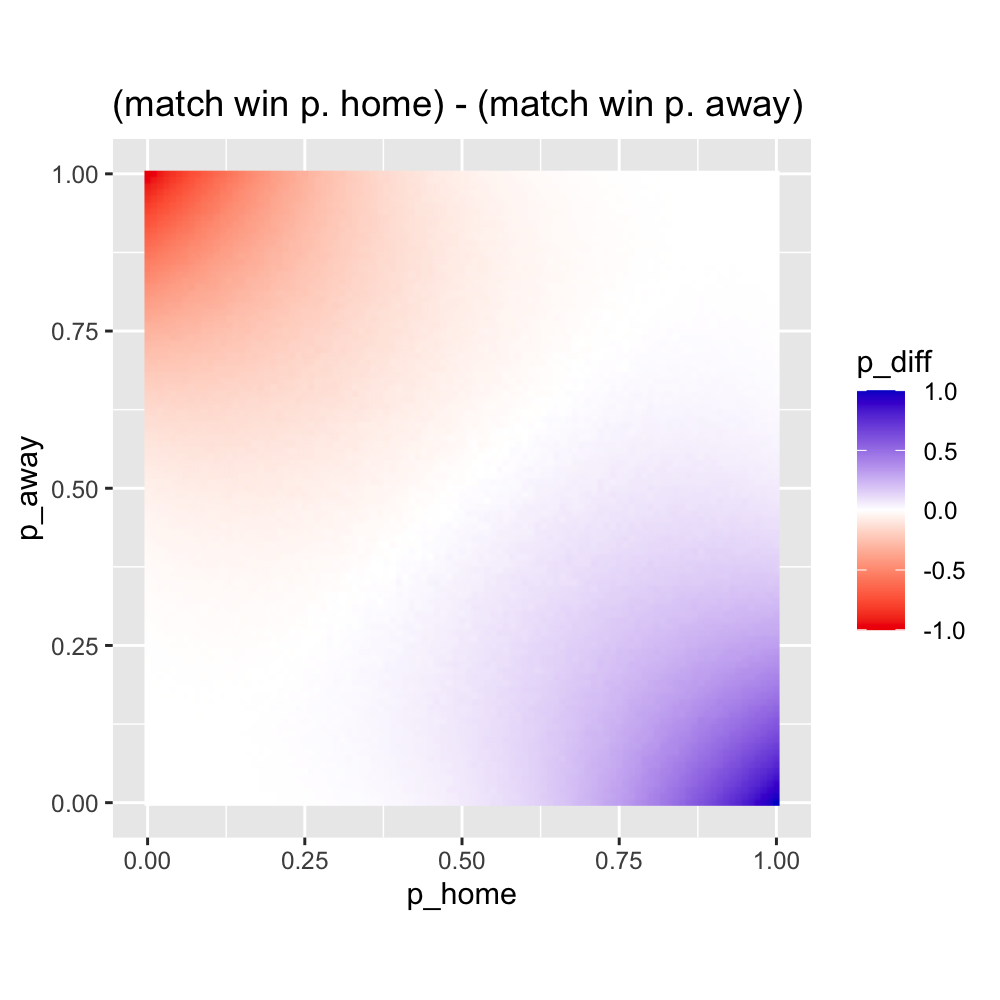

In [128]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res=200)

p_home <- seq(0, 1, 0.01)
p_away <- seq(0, 1, 0.01)

compare_data <- expand.grid(p_home=p_home, p_away=p_away, n=n) %>% 
  mutate(p_diff = mapply(NBA_win_prob_enhanced, p_home, p_away, 20000, 7, TRUE) - 
           mapply(NBA_win_prob_enhanced, p_home, p_away, 20000, 7, FALSE))

ggplot(compare_data, aes(p_home, p_away))+ 
  geom_raster(aes(fill=p_diff), interpolate = TRUE)+
  coord_fixed(ratio = 1)+
  scale_fill_gradient2(
    low = "red2", 
    mid = "white", 
    high = "blue3", 
    midpoint = 0
  )+
  labs(title = '(match win p. home) - (match win p. away)')

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال دوم 
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        در یک فرایند پواسون زمان بین دو اتفاق از یک توزیع نمایی پیروی می‌کند. اگر بخواهیم زمان اتفاق n‌ام را پیش‌بینی کنیم از توزیع گاما استفاده می‌کنیم.
        $$T_n=\sum_{i=1}^n{X_i},\  X_i  s\ are\ i.i.d\ and\ X_i\sim Exp(\lambda)$$
        $$T_n\sim Gamma(n, \lambda)$$
       حال فرض کنید فاصله زمانی ورود دانشجویان به کلاس درس حضوری از توزیع پوآسون پیروی میکند.
        <br>
        الف)
        1000  نمونه تصادفی برای زمان بین ورود دانشجو ها تولید کنید و نمودارهای هیستوگرام داده‌های تولیدشده و چگالی توزیع آن را در یک نمودار رسم کنید.
        نمودار هیستوگرام شما باید چگالی احتمال را برای هر نمونه را نشان دهد.
            </font>
</div>
    </font>
</div>

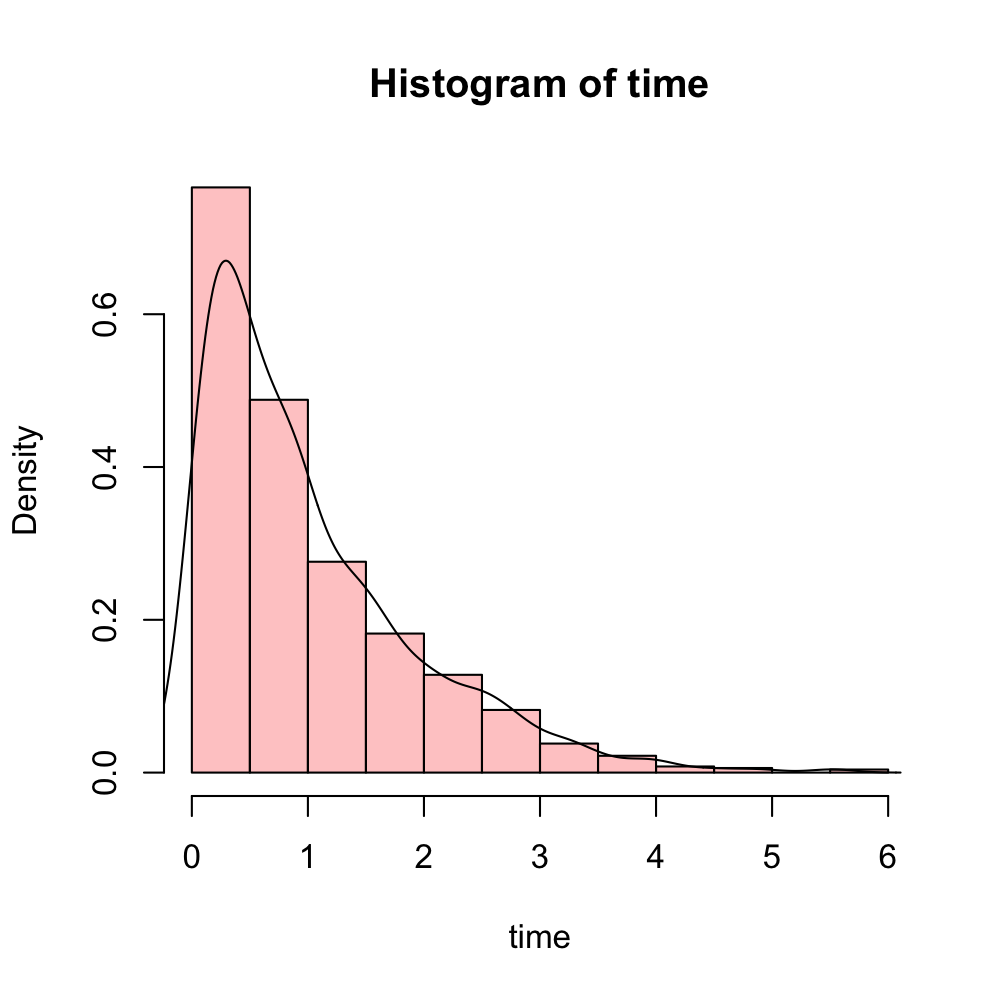

In [245]:
time  <- rexp(1000)
hist(time, prob = TRUE, col=rgb(1, 0, 0, 1/4))
lines(density(time))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        ب)
        بی‌حافظگی توزیع نمایی را با داده‌های تولید شده در قسمت قبل و رسم نمودار به همان شکل نشان دهید.
     </font>
</div>

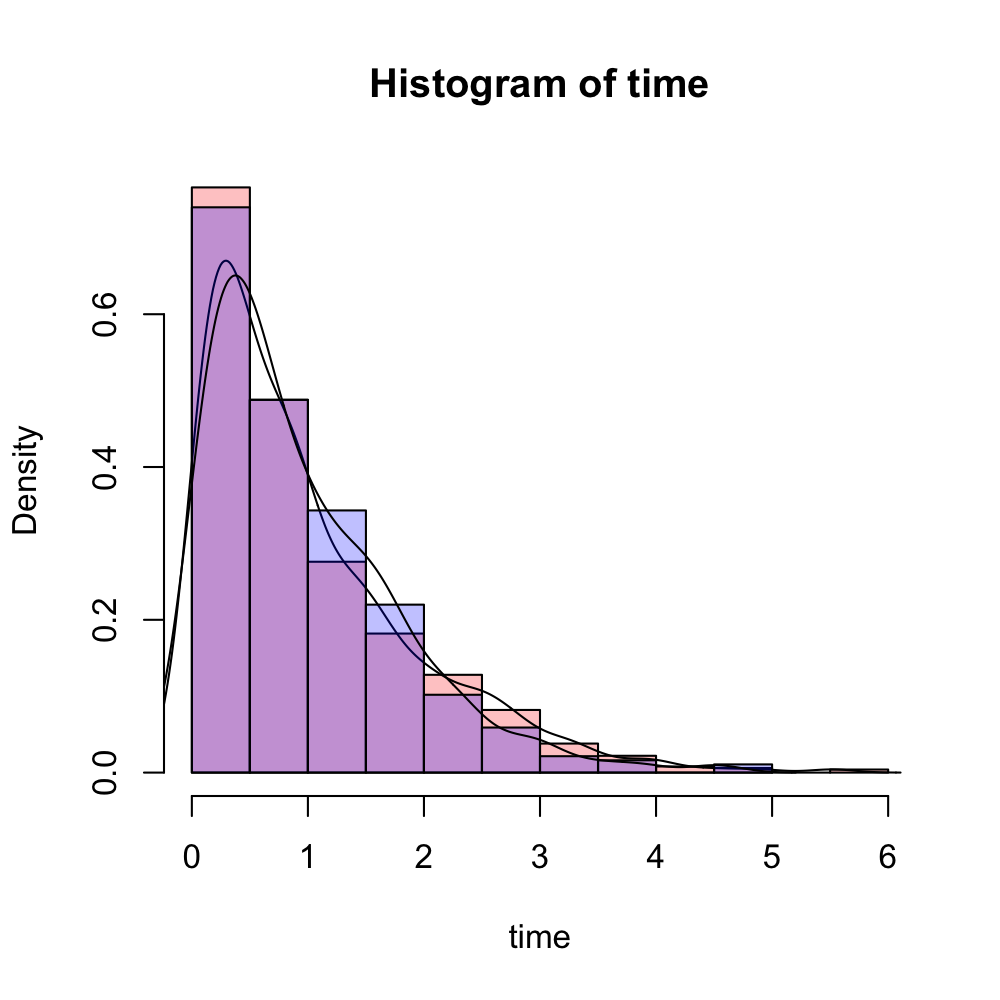

In [246]:
filtered_time  <- time[time > 1] - 1

hist(time, prob = TRUE, col=rgb(1, 0, 0, 1/4))
lines(density(time))

hist(filtered_time, prob = TRUE, col=rgb(0, 0, 1, 1/4), add=TRUE)
lines(density(filtered_time))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        ج)
       با تولید n=10 متغیرتصادفی نمایی، ویژگی گفته شده در صورت سوال را بررسی کنید. برای این‌کار می‌توانید برای شبیه‌سازی هر متغیرتصادفی مانند قسمت الف عمل کنید. 
     </font>
</div>

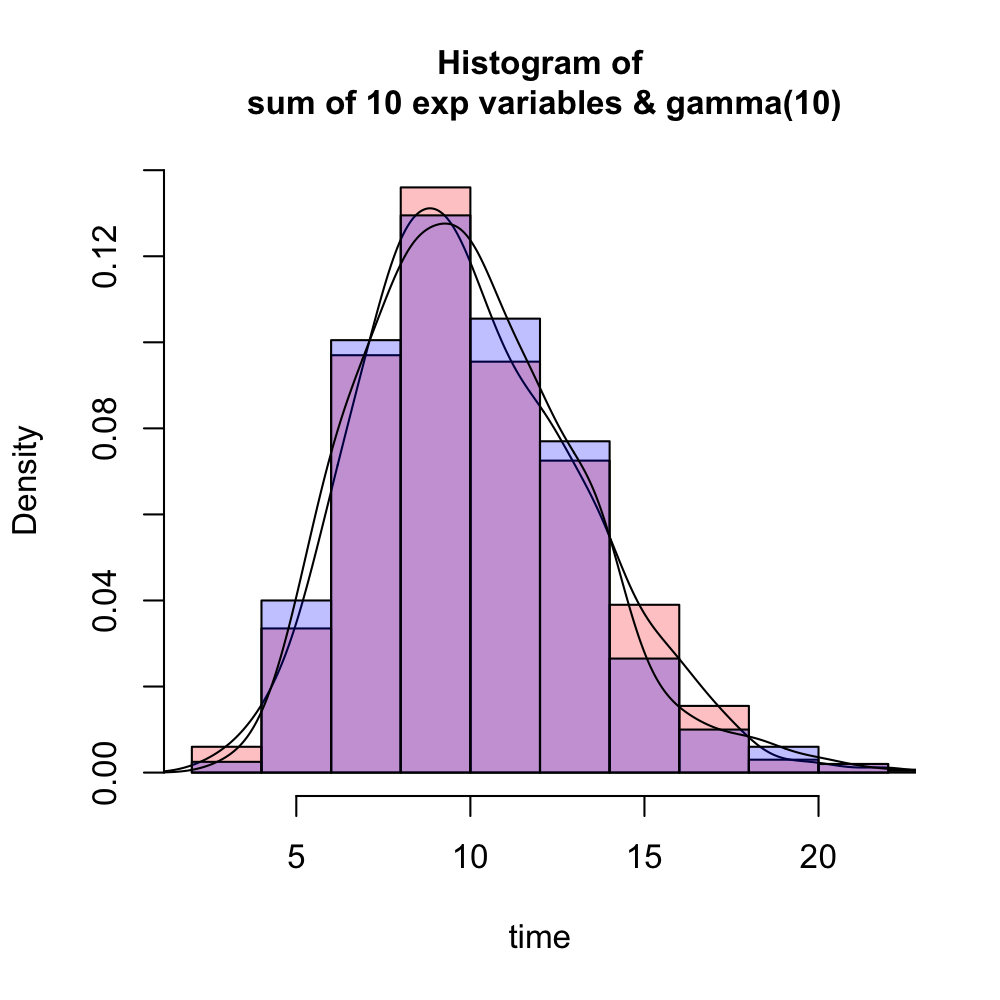

In [247]:
exp_data <- replicate(1000, sum(rexp(10)))
gamma_data <- rgamma(1000, 10)

hist(exp_data, prob=TRUE, col=rgb(1,0, 0, 1/4),
     main = "Histogram of\n sum of 10 exp variables & gamma(10)", cex.main=1, xlab="time")
lines(density(exp_data))

hist(gamma_data, prob=TRUE, col=rgb(0, 0, 1, 1/4), add=TRUE)
lines(density(gamma_data))